# Task 7: Conceptual Questions

Ques.1. What is the difference between Bagging and Boosting?

Ans.1. 

| Aspect             |   Bagging                                                  |   Boosting                                                   |
| ------------------ | ---------------------------------------------------------- | ------------------------------------------------------------ |
| Purpose            | Reduces variance                                           | Reduces bias and variance                                    |
| Technique          | Trains models independently in parallel                    | Trains models sequentially, each correcting the previous     |
| Data Sampling      | Uses bootstrapped (random) samples                         | Uses weighted data based on previous errors                  |
| Final Prediction   | Majority vote (classification) or average (regression)     | Weighted vote based on model accuracy                        |
| Example Algorithms | Random Forest                                              | AdaBoost, Gradient Boosting                                  |


Ques.2. How does Random Forest reduce variance?

Ans.2.
Random Forest lowers variance by building several decision trees on randomly selected portions of the dataset and features, a technique known as bagging. Instead of relying on a single tree, it combines the outputs of all trees—using majority vote in classification or averaging in regression. This collective approach balances out the errors of individual trees, making the model more stable and less prone to overfitting.

Ques.3. What is the weakness of boosting-based methods?

Ans.3.
Boosting techniques come with a few limitations:

High sensitivity to noise and outliers: Since boosting emphasizes correcting previous mistakes, it may end up overfitting on noisy or irrelevant data.

Slower training process: As models are trained one after another, it takes more time compared to parallel approaches like bagging.

Increased complexity: Boosting models can be harder to fine-tune and interpret, making them less straightforward than some ensemble alternatives.


# Task 8: Random Forest vs Decision Tree

C:\Users\Krishna\AppData\Local\Temp\ipykernel_21236\3737271145.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
C:\Users\Krishna\AppData\Local\Temp\ipykernel_21236\3737271145.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = label_sex.fit_transform(df['sex'])
C:\Users\Krishna\AppData\Local\Temp\ipykernel_21236\3737271145.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p


Decision Tree Performance:
Accuracy : 0.7512
Precision: 0.7162
Recall   : 0.631

Random Forest Performance:
Accuracy : 0.7799
Precision: 0.8065
Recall   : 0.5952


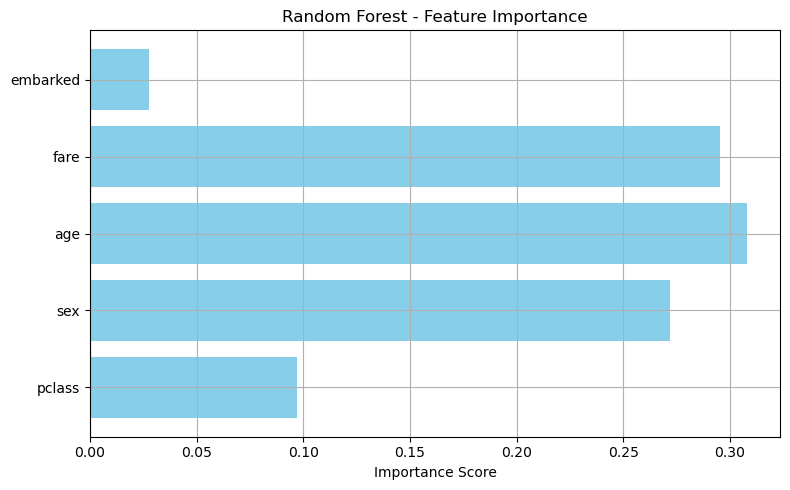

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

data = fetch_openml('titanic', version=1, as_frame=True)
df = data.frame

df = df[['survived', 'pclass', 'sex', 'age', 'fare', 'embarked']]
df.dropna(inplace=True)

label_sex = LabelEncoder()
label_embark = LabelEncoder()
df['sex'] = label_sex.fit_transform(df['sex'])
df['embarked'] = label_embark.fit_transform(df['embarked'])

inputs = df.drop('survived', axis=1)
output = df['survived'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.2, random_state=42)

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
pred_tree = tree_clf.predict(X_test)

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)
pred_forest = forest_clf.predict(X_test)

def show_metrics(model_name, actual, predicted):
    print(f"\n{model_name} Performance:")
    print("Accuracy :", round(accuracy_score(actual, predicted), 4))
    print("Precision:", round(precision_score(actual, predicted), 4))
    print("Recall   :", round(recall_score(actual, predicted), 4))

show_metrics("Decision Tree", y_test, pred_tree)
show_metrics("Random Forest", y_test, pred_forest)

importance_vals = forest_clf.feature_importances_
cols = inputs.columns

plt.figure(figsize=(8, 5))
plt.barh(cols, importance_vals, color='skyblue')
plt.xlabel("Importance Score")
plt.title("Random Forest - Feature Importance")
plt.grid(True)
plt.tight_layout()
plt.show()


# Task 9: AdaBoost or Gradient Boosting

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import time

data = load_iris(as_frame=True)
features = data.data
labels = data.target

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

def run_evaluation(model_name, clf, X_train, X_test, y_train, y_test):
    start_time = time.time()
    clf.fit(X_train, y_train)
    end_time = time.time()

    predictions = clf.predict(X_test)
    acc_score = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    exec_time = end_time - start_time

    print(f"\n{model_name} Results:")
    print(f"Accuracy  : {acc_score:.4f}")
    print(f"F1 Score  : {f1:.4f}")
    print(f"Train Time: {exec_time:.4f} seconds")

run_evaluation("Decision Tree", DecisionTreeClassifier(random_state=42), X_train, X_test, y_train, y_test)
run_evaluation("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42), X_train, X_test, y_train, y_test)



Decision Tree Results:
Accuracy  : 1.0000
F1 Score  : 1.0000
Train Time: 0.0020 seconds

Random Forest Results:
Accuracy  : 1.0000
F1 Score  : 1.0000
Train Time: 0.0856 seconds
